In [3]:
import numpy as np
import matplotlib.pyplot as plt
import string 
import os
from collections import defaultdict
import pdb

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import TfidfVectorizer
from transformTraditional.transformTraditional import TransformTraditional
from weighUnlabelled.weighUnlabelled import WeighUnlabelled
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

stop_words = set(stopwords.words('english'))
with open('additional_stopwords.txt', 'r') as f:
    for line in f:
        stop_words.add(stemmer.stem(line.strip().lower()))

topk = 50

dictionary = defaultdict(lambda: 0)

def tokenize(text):
    tokens = word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(stemmer.stem(item))
    return stems

path = '/scratchd/home/adityaas/MyResearch/Baselines_DCAP/pu-learning/src/datasets/'

translator = str.maketrans('', '', string.punctuation)

In [4]:
token_dict = {}


dictionary = defaultdict(lambda: 0)

for dirpath, dirs, files in os.walk(path+'P/'):
    for f in files:
        fname = os.path.join(dirpath, f)
        with open(fname) as pearl:
            text = pearl.read()
            token_dict[f] = text.replace('\n', ' ').lower().translate(translator)

            for word in tokenize(token_dict[f]):
                if word not in stop_words:
                    dictionary[word] += 1
                    
P_data = []
P_labels = []
for value in token_dict.values():
    P_data.append(value)
    P_labels.append(1)

reverse_dictionary_list = list(reversed(sorted(dictionary.items(), key=lambda x:x[1])))

encoding_list = reverse_dictionary_list[0:topk]
many_hot_list = [i[0] for i in encoding_list]

data = np.zeros((1,topk))
select = []
labels = []

In [5]:
for d in P_data:
    tokens = tokenize(d)
    vector = []
    for i in many_hot_list:
        if i in tokens:
            vector.append(1)
        else:
            vector.append(0)

    vector = np.asarray(vector).reshape((1, topk))
    data = np.append(data, vector, axis=0)
    labels.append(1.0)
    select.append(1.0)

data = np.delete(data, (0), axis=0)

token_dict = {}
for dirpath, dirs, files in os.walk(path+'N/'):
    for f in files:
        fname = os.path.join(dirpath, f)
        with open(fname) as pearl:
            text = pearl.read()
            token_dict[f] = text.replace('\n', ' ').lower().translate(translator)

N_data = []
N_labels = []
for value in token_dict.values():
    N_data.append(value)
    N_labels.append(0)

for d in N_data:
    tokens = tokenize(d)
    vector = []
    for i in many_hot_list:
        if i in tokens:
            vector.append(1)
        else:
            vector.append(0)

    vector = np.asarray(vector).reshape((1, topk))
    data = np.append(data, vector, axis=0)
    labels.append(-1.0)
    select.append(-1.0)

token_dict = {}

for dirpath, dirs, files in os.walk(path+'Q/'):
    for f in files:
        fname = os.path.join(dirpath, f)
        with open(fname) as pearl:
            text = pearl.read()
            token_dict[f] = text.replace('\n', ' ').lower().translate(translator)

Q_data = []
Q_labels = []
for value in token_dict.values():
    Q_data.append(value)
    Q_labels.append(0)

for d in Q_data:
    tokens = tokenize(d)
    vector = []
    for i in many_hot_list:
        if i in tokens:
            vector.append(1)
        else:
            vector.append(0)

    vector = np.asarray(vector).reshape((1, topk))
    data = np.append(data, vector, axis=0)
    labels.append(1.0)
    select.append(-1.0)

In [32]:
select = np.array(select)
labels = np.array(labels)
# Data = <X, S, Y>

all_data = np.array(list(zip(data, select, labels)))

print("Total Data Size: ", len(all_data))
print("Positive Labeled: ", len(P_data))
print("Positive Unlabeled: ", len(Q_data))
print("Negative Unlabeled: ", len(N_data))

print("-----------------------------------------------")
print("-----------------------------------------------")

indices = np.arange(len(all_data))

np.random.seed(357)
np.random.shuffle(all_data)

trainlen = int(0.8*len(all_data))
train_data = all_data[0:trainlen]
test_data = all_data[trainlen:]


train_X = []
train_X_temp = train_data[:,0]
for x in train_X_temp:
    train_X.append(x)

train_X = np.array(train_X)
train_S = np.array(train_data[:,1])
train_Y = np.array(train_data[:,2])

test_X = []
test_X_temp = test_data[:,0]
for x in test_X_temp:
    test_X.append(x)

test_X = np.array(test_X)
test_S = np.array(test_data[:,1])
test_Y = np.array(test_data[:,2])

print("Train Data Size: ", len(train_data))
print("Train Labeled Size: ", len(np.where(train_S == +1.)[0]))
print("Train Unlabeled Size: ", len(np.where(train_S == -1.)[0]))

print("-----------------------------------------------")
print("-----------------------------------------------")


print("Test Data Size: ", len(test_data))
print("Test Labeled Size: ", len(np.where(test_S == +1.)[0]))
print("Test Unlabeled Size: ", len(np.where(test_S == -1.)[0]))

print("-----------------------------------------------")
print("-----------------------------------------------")


Total Data Size:  7359
Positive Labeled:  2453
Positive Unlabeled:  348
Negative Unlabeled:  4558
-----------------------------------------------
-----------------------------------------------
Train Data Size:  5887
Train Labeled Size:  1967
Train Unlabeled Size:  3920
-----------------------------------------------
-----------------------------------------------
Test Data Size:  1472
Test Labeled Size:  486
Test Unlabeled Size:  986
-----------------------------------------------
-----------------------------------------------


In [39]:


n_sacrifice_iter = range(0, 2*len(np.where(train_S == +1.)[0])//3, 100)

print(len(n_sacrifice_iter))


train_X = train_X.astype(int)
train_S = train_S.astype(int)
train_Y = train_Y.astype(int)


test_X = test_X.astype(int)
test_S = test_S.astype(int)
test_Y = test_S.astype(int)


pu_f1_scores = []
reg_f1_scores = []


14


In [40]:
n_sacrifice_iter


range(0, 1311, 100)

In [41]:
for n_sacrifice in n_sacrifice_iter:

    train_S_pu = np.copy(train_S)

    pos = np.where(train_S == +1)[0]  
    np.random.shuffle(pos)
    sacrifice = pos[:n_sacrifice]
    train_S_pu[sacrifice] = -1

    estimator = svm.SVC(probability=True)

    # estimator = RandomForestClassifier(n_estimators=100,
    #                                    criterion='gini', 
    #                                    bootstrap=True,
    #                                    n_jobs=1)
    print("--------------------------------------------")
    print("--------------------------------------------")

    print("Labeled: ", len(np.where(train_S_pu == +1)[0]))
    print("Unlabeled: ", len(np.where(train_S_pu == -1)[0]))

    pu_estimator = TransformTraditional(estimator)
    pu_estimator.fit(train_X,train_S_pu)

    y_pred = pu_estimator.predict(test_X)

    precision, recall, f1_score, _ = precision_recall_fscore_support(test_Y, y_pred)
    pu_f1_scores.append(f1_score[1])

    print("F1 score: ", f1_score[1])
    print("Precision: ", precision[1])
    print("Recall: ", recall[1])
    
    print("--------------------------------------------")

    print("Regular learning in progress...")

    estimator = svm.SVC(probability=True)

    # estimator = RandomForestClassifier(n_estimators=100,
    #                                    bootstrap=True,
    #                                    n_jobs=1)


    estimator.fit(train_X,train_S_pu)
    y_pred = estimator.predict(test_X)

    precision, recall, f1_score, _ = precision_recall_fscore_support(test_Y, y_pred)

    reg_f1_scores.append(f1_score[1])
    print("F1 score: ", f1_score[1])
    print("Precision: ", precision[1])
    print("Recall: ", recall[1])


--------------------------------------------
--------------------------------------------
Labeled:  1967
Unlabeled:  3920
F1 score:  0.843687374749499
Precision:  0.822265625
Recall:  0.8662551440329218
--------------------------------------------
Regular learning in progress...
F1 score:  0.8422131147540983
Precision:  0.8387755102040816
Recall:  0.845679012345679
--------------------------------------------
--------------------------------------------
--------------------------------------------
--------------------------------------------
Labeled:  1867
Unlabeled:  4020
F1 score:  0.8421052631578947
Precision:  0.8286852589641435
Recall:  0.8559670781893004
--------------------------------------------
Regular learning in progress...
F1 score:  0.8431983385254413
Precision:  0.8511530398322851
Recall:  0.8353909465020576
--------------------------------------------
--------------------------------------------
--------------------------------------------
------------------------------

/home/adityaas/anaconda3/envs/pyenv3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 score:  0.0
Precision:  0.0
Recall:  0.0
--------------------------------------------
--------------------------------------------
--------------------------------------------
--------------------------------------------
Labeled:  867
Unlabeled:  5020
F1 score:  0.7306889352818372
Precision:  0.7415254237288136
Recall:  0.720164609053498
--------------------------------------------
Regular learning in progress...
F1 score:  0.0
Precision:  0.0
Recall:  0.0
--------------------------------------------
--------------------------------------------
--------------------------------------------
--------------------------------------------
Labeled:  767
Unlabeled:  5120
F1 score:  0.5957170668397145
Precision:  0.43507109004739336
Recall:  0.9444444444444444
--------------------------------------------
Regular learning in progress...
F1 score:  0.0
Precision:  0.0
Recall:  0.0
--------------------------------------------
--------------------------------------------
------------------------

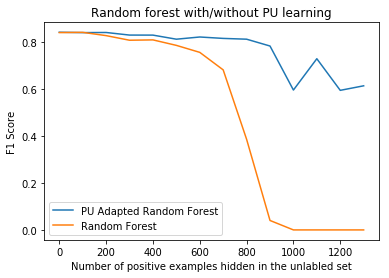

14

In [42]:
plt.title("Random forest with/without PU learning")
plt.plot(n_sacrifice_iter, pu_f1_scores, label='PU Adapted Random Forest')
plt.plot(n_sacrifice_iter, reg_f1_scores, label='Random Forest')
plt.xlabel('Number of positive examples hidden in the unlabled set')
plt.ylabel('F1 Score')
plt.legend()
plt.show()
len(reg_f1_scores)